In [10]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import utils
from tqdm.notebook import tqdm
import xarray as xr
from torchsummary import summary
from matplotlib import cm as cmap
import random

import xarrayaita.aita as xa

In [3]:
ds_CI02 = xr.load_dataset("data/CNN/CI02.xr").dropna(dim='nbtj')
ds_CI04 = xr.load_dataset("data/CNN/CI04.xr").dropna(dim='nbtj')
ds_CI06 = xr.load_dataset("data/CNN/CI06.xr").dropna(dim='nbtj')
ds_CI09 = xr.load_dataset("data/CNN/CI09.xr").dropna(dim='nbtj')
ds_CI21 = xr.load_dataset("data/CNN/CI21.xr").dropna(dim='nbtj')

data_list =[ds_CI02,ds_CI04,ds_CI06,ds_CI09,ds_CI21]

ds_CI02_norm = ds_CI02.copy()
ds_CI04_norm = ds_CI04.copy()
ds_CI06_norm = ds_CI06.copy()
ds_CI09_norm = ds_CI09.copy()
ds_CI21_norm = ds_CI21.copy()

data_norm_list =[ds_CI02_norm,ds_CI04_norm,ds_CI06_norm,ds_CI09_norm,ds_CI21_norm]
names = ["TJ_CI02","TJ_CI04","TJ_CI06","TJ_CI09","TJ_CI21"]

for k in range(5):

    vars = list(data_list[k].keys())
    vars = vars[1:9]
    for i in vars :
        v = data_list[k][i].to_numpy().reshape((data_list[k].dims['nbtj'],100))
        scaler = StandardScaler().fit(v)
        v_scaled = scaler.transform(v)
        v_scaled = v_scaled.reshape((data_list[k].dims['nbtj'],10,10))
        data_norm_list[k][i] = xr.DataArray(v_scaled,dims=['nbtj','y','x'])

In [8]:
data = data_list[0]
dt1 = data.where(data.RX==1).dropna(dim='nbtj')
dt0 = data.where(data.RX==0).dropna(dim='nbtj')

In [40]:
def flip_arr_o_mat(arr):
    """
    """
    fliped = np.zeros(arr.shape)
    for i in range(arr.shape[0]):
        fliped[i] = np.fliplr(arr.to_numpy()[i])
    return xr.DataArray(fliped,dims=arr.dims)

In [56]:
def rot180_arr_o_mat(arr):
    """
    """
    rotated = np.zeros(arr.shape)
    for i in range(arr.shape[0]):
        rotated[i] = np.rot90(np.rot90(arr.to_numpy()[i]))
    return xr.DataArray(rotated,dims=arr.dims)

In [ ]:
def flip(data):
    """
    """

    ds = xr.Dataset()

    RX = data.RX
    RX_map = flip_arr_o_mat(data.RX_map)
    schmid = flip_arr_o_mat(data.schmid)
    diff_schmid = flip_arr_o_mat(data.diff_schmid)
    misangle = flip_arr_o_mat(data.misangle)
    work = flip_arr_o_mat(data.work)
    eqStrain = flip_arr_o_mat(data.eqStrain)
    eqStress = flip_arr_o_mat(data.eqStress)
    act_pr = flip_arr_o_mat(data.act_pr)
    act_py = flip_arr_o_mat(data.act_py)
    dist2oTJ = data.dist_to_1neigh
    volratio_an = data.volratio_an
    nb_pix_g = data.sum_pix_g


    ds['RX'] = xr.DataArray(RX,dims="nbtj")
    ds['RX_map'] = xr.DataArray(RX_map,dims=["nbtj","y","x"])
    ds['schmid'] = xr.DataArray(schmid,dims=["nbtj","y","x"])
    ds['diff_schmid'] = xr.DataArray(diff_schmid,dims=["nbtj","y","x"])
    ds['misangle'] = xr.DataArray(misangle,dims=["nbtj","y","x"])
    ds['work'] = xr.DataArray(work,dims=["nbtj","y","x"])
    ds['eqStrain'] = xr.DataArray(eqStrain,dims=["nbtj","y","x"])
    ds['eqStress'] = xr.DataArray(eqStress,dims=["nbtj","y","x"])
    ds['act_pr'] = xr.DataArray(act_pr,dims=["nbtj","y","x"])
    ds['act_py'] = xr.DataArray(act_py,dims=["nbtj","y","x"])


    ds['dist_to_1neigh'] = xr.DataArray(dist2oTJ,dims='nbtj')
    ds['volratio_an'] = xr.DataArray(volratio_an,dims='nbtj')
    ds['sum_pix_g'] = xr.DataArray(nb_pix_g,dims='nbtj')

    return ds
    

In [57]:
def rot180(data):
    """
    """

    ds = xr.Dataset()

    RX = data.RX
    RX_map = rot180_arr_o_mat(data.RX_map)
    schmid = rot180_arr_o_mat(data.schmid)
    diff_schmid = rot180_arr_o_mat(data.diff_schmid)
    misangle = rot180_arr_o_mat(data.misangle)
    work = rot180_arr_o_mat(data.work)
    eqStrain = rot180_arr_o_mat(data.eqStrain)
    eqStress = rot180_arr_o_mat(data.eqStress)
    act_pr = rot180_arr_o_mat(data.act_pr)
    act_py = rot180_arr_o_mat(data.act_py)
    dist2oTJ = data.dist_to_1neigh
    volratio_an = data.volratio_an
    nb_pix_g = data.sum_pix_g


    ds['RX'] = xr.DataArray(RX,dims="nbtj")
    ds['RX_map'] = xr.DataArray(RX_map,dims=["nbtj","y","x"])
    ds['schmid'] = xr.DataArray(schmid,dims=["nbtj","y","x"])
    ds['diff_schmid'] = xr.DataArray(diff_schmid,dims=["nbtj","y","x"])
    ds['misangle'] = xr.DataArray(misangle,dims=["nbtj","y","x"])
    ds['work'] = xr.DataArray(work,dims=["nbtj","y","x"])
    ds['eqStrain'] = xr.DataArray(eqStrain,dims=["nbtj","y","x"])
    ds['eqStress'] = xr.DataArray(eqStress,dims=["nbtj","y","x"])
    ds['act_pr'] = xr.DataArray(act_pr,dims=["nbtj","y","x"])
    ds['act_py'] = xr.DataArray(act_py,dims=["nbtj","y","x"])


    ds['dist_to_1neigh'] = xr.DataArray(dist2oTJ,dims='nbtj')
    ds['volratio_an'] = xr.DataArray(volratio_an,dims='nbtj')
    ds['sum_pix_g'] = xr.DataArray(nb_pix_g,dims='nbtj')

    return ds
    

In [52]:
f = flip(dt1)

In [58]:
r = rot180(dt1)

In [60]:
rf = flip(rot180(dt1))

Text(0.5, 0.98, 'CI02 : TJ4 RX = 1 Dtfn = 44.283 relativ_an = 1.069 sum_pix_g = 30609')

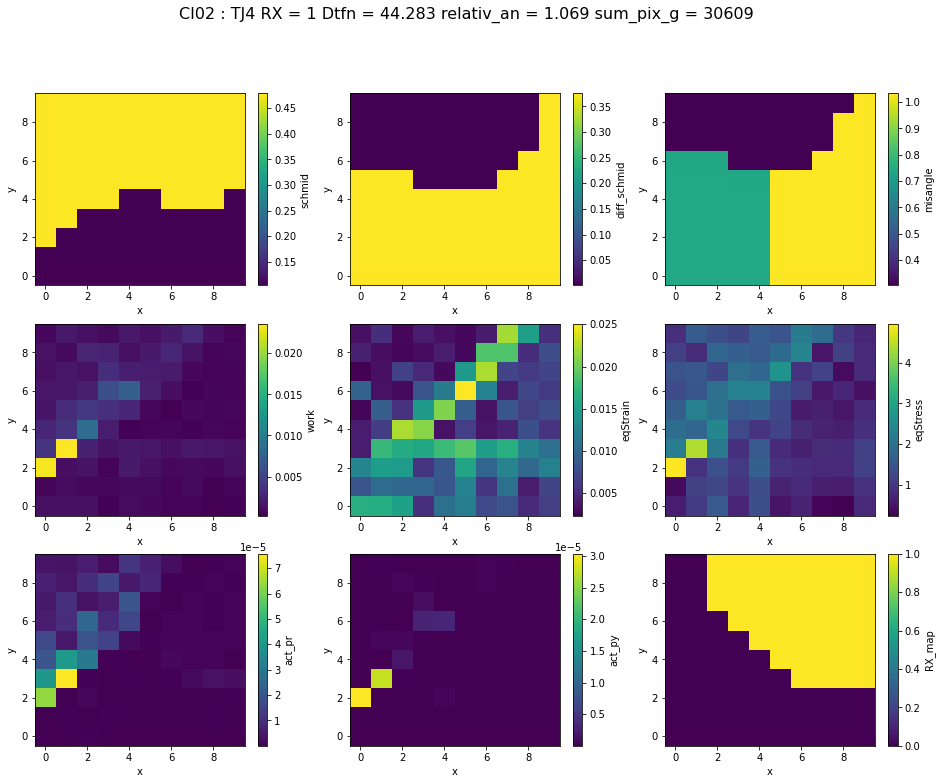

In [53]:
i = 4
fig = plt.figure(figsize=(16,12))
plt.subplot(331)
f.schmid[i].plot()
plt.subplot(332)
f.diff_schmid[i].plot()
plt.subplot(333)
f.misangle[i].plot()
plt.subplot(334)
f.work[i].plot()
plt.subplot(335)
f.eqStrain[i].plot()
plt.subplot(336)
f.eqStress[i].plot()
plt.subplot(337)
f.act_pr[i].plot()
plt.subplot(338)
f.act_py[i].plot()
plt.subplot(339)
f.RX_map[i].plot()
fig.suptitle("CI02 : TJ" + str(i) + " RX = "+str(int(f.RX[i]))+" Dtfn = "+str(round(float(f.dist_to_1neigh[i]),3))+" volratio_an = "+str(round(float(f.volratio_an[i]),3))+" sum_pix_g = "+str(int(f.sum_pix_g[i])),fontsize=16)

Text(0.5, 0.98, 'CI02 : TJ4 RX = 1 Dtfn = 44.283 relativ_an = 1.069 sum_pix_g = 30609')

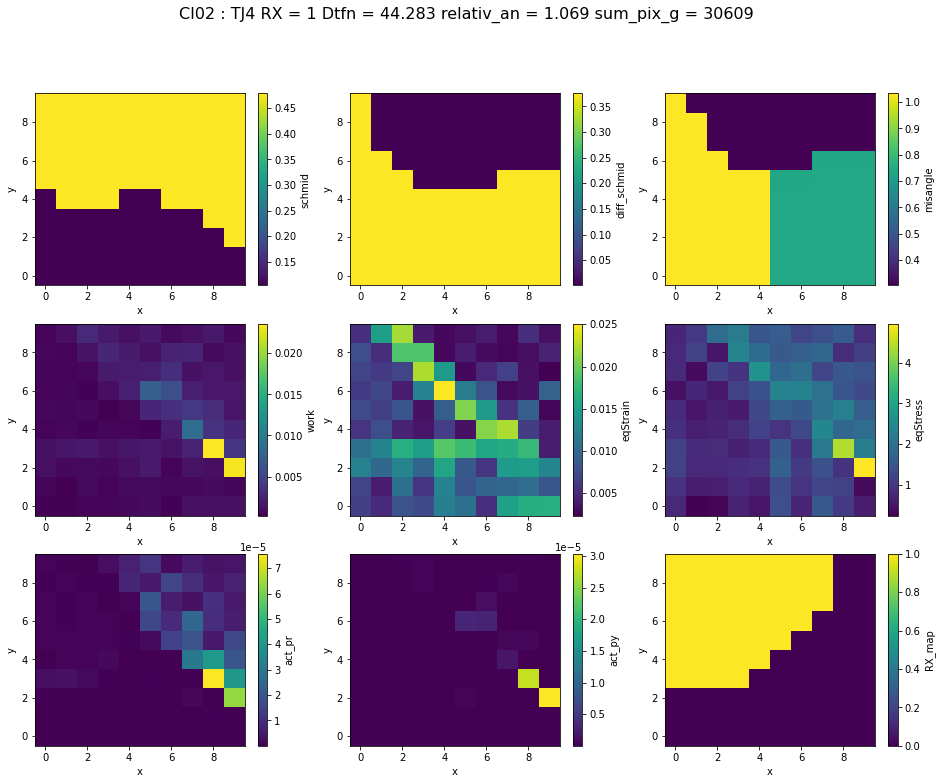

In [54]:
i = 4
fig = plt.figure(figsize=(16,12))
plt.subplot(331)
dt1.schmid[i].plot()
plt.subplot(332)
dt1.diff_schmid[i].plot()
plt.subplot(333)
dt1.misangle[i].plot()
plt.subplot(334)
dt1.work[i].plot()
plt.subplot(335)
dt1.eqStrain[i].plot()
plt.subplot(336)
dt1.eqStress[i].plot()
plt.subplot(337)
dt1.act_pr[i].plot()
plt.subplot(338)
dt1.act_py[i].plot()
plt.subplot(339)
dt1.RX_map[i].plot()
fig.suptitle("CI02 : TJ" + str(i) + " RX = "+str(int(dt1.RX[i]))+" Dtfn = "+str(round(float(dt1.dist_to_1neigh[i]),3))+" volratio_an = "+str(round(float(dt1.volratio_an[i]),3))+" sum_pix_g = "+str(int(dt1.sum_pix_g[i])),fontsize=16)

Text(0.5, 0.98, 'CI02 : TJ4 RX = 1 Dtfn = 44.283 relativ_an = 1.069 sum_pix_g = 30609')

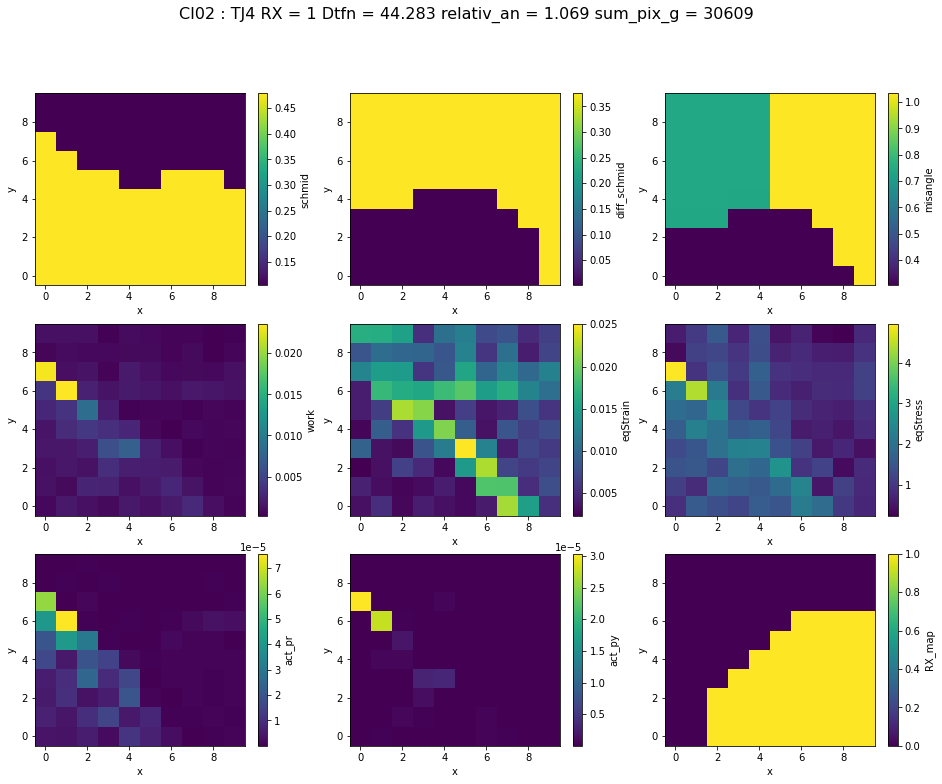

In [59]:
i = 4
fig = plt.figure(figsize=(16,12))
plt.subplot(331)
r.schmid[i].plot()
plt.subplot(332)
r.diff_schmid[i].plot()
plt.subplot(333)
r.misangle[i].plot()
plt.subplot(334)
r.work[i].plot()
plt.subplot(335)
r.eqStrain[i].plot()
plt.subplot(336)
r.eqStress[i].plot()
plt.subplot(337)
r.act_pr[i].plot()
plt.subplot(338)
r.act_py[i].plot()
plt.subplot(339)
r.RX_map[i].plot()
fig.suptitle("CI02 : TJ" + str(i) + " RX = "+str(int(r.RX[i]))+" Dtfn = "+str(round(float(r.dist_to_1neigh[i]),3))+" volratio_an = "+str(round(float(r.volratio_an[i]),3))+" sum_pix_g = "+str(int(r.sum_pix_g[i])),fontsize=16)

Text(0.5, 0.98, 'CI02 : TJ4 RX = 1 Dtfn = 44.283 relativ_an = 1.069 sum_pix_g = 30609')

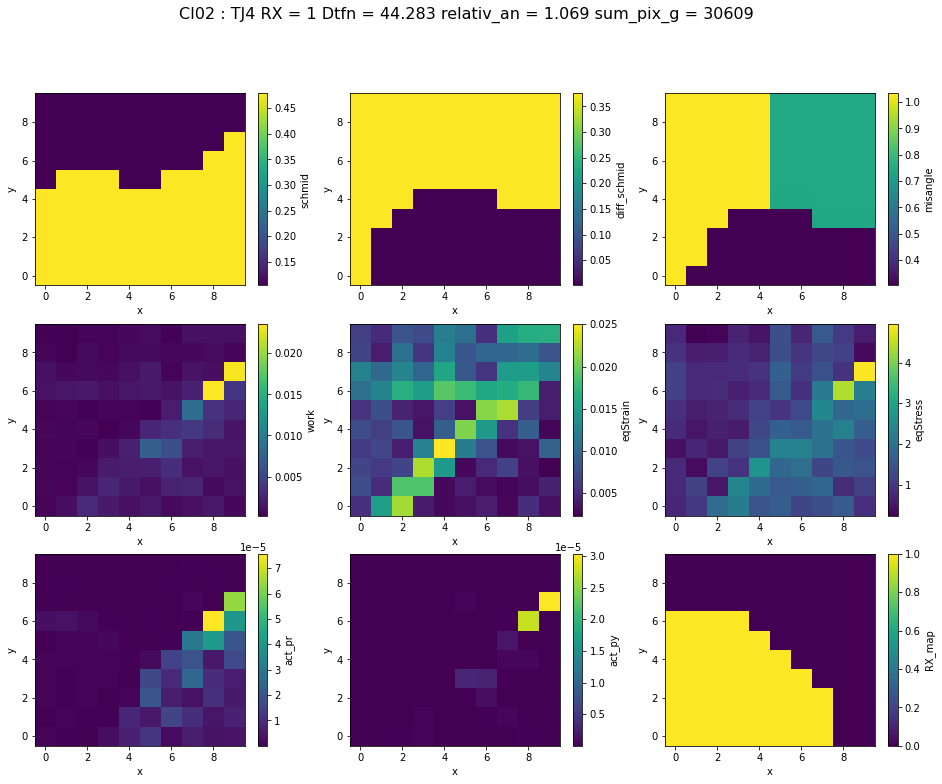

In [61]:
i = 4
fig = plt.figure(figsize=(16,12))
plt.subplot(331)
rf.schmid[i].plot()
plt.subplot(332)
rf.diff_schmid[i].plot()
plt.subplot(333)
rf.misangle[i].plot()
plt.subplot(334)
rf.work[i].plot()
plt.subplot(335)
rf.eqStrain[i].plot()
plt.subplot(336)
rf.eqStress[i].plot()
plt.subplot(337)
rf.act_pr[i].plot()
plt.subplot(338)
rf.act_py[i].plot()
plt.subplot(339)
rf.RX_map[i].plot()
fig.suptitle("CI02 : TJ" + str(i) + " RX = "+str(int(rf.RX[i]))+" Dtfn = "+str(round(float(rf.dist_to_1neigh[i]),3))+" volratio_an = "+str(round(float(rf.volratio_an[i]),3))+" sum_pix_g = "+str(int(rf.sum_pix_g[i])),fontsize=16)